In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Create a Graph
G = nx.Graph()

In [28]:
file_path = "oscars_bp.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

In [29]:
# Fill movie_people dictionary with actors and directors for each film
movie_people = {}

for _, row in df.iterrows():
    movie = row["Film"]  # Change 'movie' to the actual column name
    actors = str(row["Actors"]).split(", ") if pd.notna(row["Actors"]) else []
    directors = str(row["Directors"]).split(", ") if pd.notna(row["Directors"]) else []
    
    movie_people[movie] = {"actors": actors, "directors": directors}

In [30]:
# Add nodes and edges
for movie, people in movie_people.items():
    for director in people["directors"]:
        G.add_node(director, role="director")
        for actor in people["actors"]:
            G.add_node(actor, role="actor")
            G.add_edge(actor, director)

In [31]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, k=10)
# Get top 50 most connected nodes by degree centrality
top_50_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:50]
top_50_nodes = [node for node, _ in top_50_nodes]

In [32]:
# Print top central figures in the network
top_degree = [(name, centrality) for name, centrality in sorted_degree]
top_betweenness = [(name, centrality) for name, centrality in sorted_betweenness]

print("Top 0 by Degree Centrality:")
for name, centrality in top_degree:
    print(f"{name}: {centrality}")

print("\nTop 10 by Betweenness Centrality:")
for name, centrality in top_betweenness:
    print(f"{name}: {centrality}")

Top 0 by Degree Centrality:
Steven Spielberg: 0.03217993079584775
William Wyler: 0.02906574394463668
Martin Scorsese: 0.025605536332179935
Oliver Stone: 0.021591695501730106
Frank Capra: 0.02083044982698962
George Stevens: 0.02083044982698962
Sam Wood: 0.017093425605536335
John Ford: 0.016955017301038065
Michael Curtiz: 0.01674740484429066
Clint Eastwood: 0.014325259515570935

Top 10 by Betweenness Centrality:
Sam Wood: 0.11829789198074167
Robert Wise: 0.11319296871035064
George Stevens: 0.10963960194242676
Mel Gibson: 0.1087472925658991
Tom Hooper: 0.10790231015260862
John Boorman: 0.10135788041962908
Harry Beaumont: 0.10082673929886242
Steven Spielberg: 0.07683040166863861
Henry Koster: 0.0761556851120891
W.S. Van Dyke: 0.07472996816079466


In [36]:
# Create a subgraph with the top 50 nodes
G_top_50 = G.subgraph(top_50_nodes)

print(f"Subgraph has {G_top_50.number_of_nodes()} nodes and {G_top_50.number_of_edges()} edges.")

# Visualizing the subgraph
plt.figure(figsize=(10, 10))

# Choose a layout for the graph
pos = nx.spring_layout(G_top_50, k=0.3, iterations=20)

Subgraph has 50 nodes and 18 edges.


<Figure size 1000x1000 with 0 Axes>

{'Norman Jewison': Text(0.6245895184535999, -0.761456639499066, 'Norman Jewison'),
 'David O. Russell': Text(0.8572980780339658, 0.043631196200410144, 'David O. Russell'),
 'W.S. Van Dyke': Text(0.5018744253388445, -0.8943511779086801, 'W.S. Van Dyke'),
 'Quentin Tarantino': Text(0.8277578428990165, -0.05883758567685438, 'Quentin Tarantino'),
 'Tom Hooper': Text(-0.4218839507930128, 0.792264574154264, 'Tom Hooper'),
 'Adam McKay': Text(0.25895192321512117, 0.9552938812307604, 'Adam McKay'),
 'Ron Howard': Text(-0.6466956815165305, 0.6845637485633933, 'Ron Howard'),
 'Roman Polanski': Text(0.9090557218166148, 0.349026602474371, 'Roman Polanski'),
 'Victor Fleming': Text(0.8123091707137462, -0.42657411092904063, 'Victor Fleming'),
 'Andrew Marton': Text(0.3228991549792907, 0.8525250371277078, 'Andrew Marton'),
 'John Huston': Text(0.8112650017239024, -0.10931122162197232, 'John Huston'),
 'Joel Coen': Text(0.09330057482291036, 0.963246298349531, 'Joel Coen'),
 'Baz Luhrmann': Text(-0.513

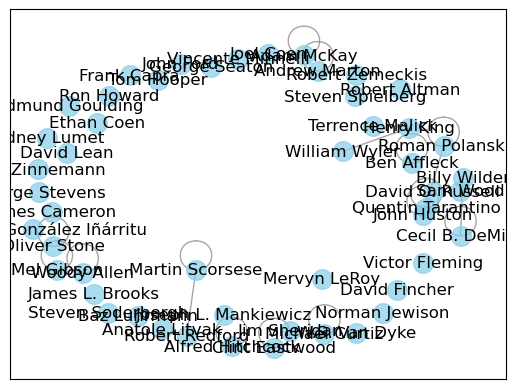

In [38]:
nx.draw_networkx_nodes(G_top_50, pos, node_size=200, node_color="skyblue", alpha=0.7)
nx.draw_networkx_edges(G_top_50, pos, width=1.0, alpha=0.7, edge_color="gray")
nx.draw_networkx_labels(G_top_50, pos, font_size=12, font_family="sans-serif")

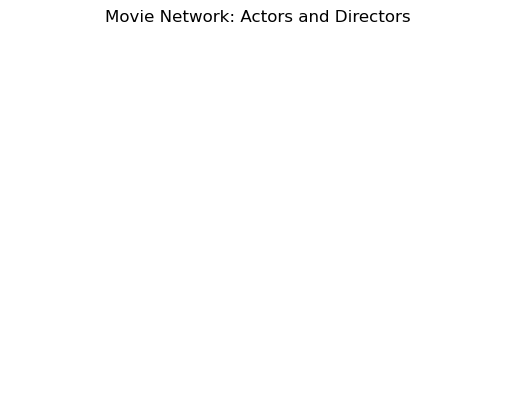

In [37]:
# Show the plot
plt.title("Movie Network: Actors and Directors")
plt.axis("off")  # Disable axis
plt.show()